# Intial Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("titanic_train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


  1.sib spouses aboard
  2.parch parents or children aborad

# Exploration of Data 

<AxesSubplot:>

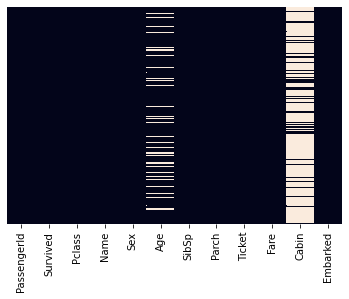

In [4]:
# finding the null data in dataset
sns.heatmap(train.isnull() , cbar=False , yticklabels=False)

Need to in some data in age & Probably drop the cabin and also one data missing in embarked

<AxesSubplot:xlabel='Survived', ylabel='count'>

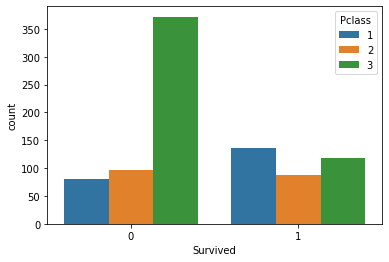

In [5]:
# checking for how many survived, using passenger class as hue param to see on more closer level
sns.countplot(x='Survived' , hue='Pclass', data=train)

Most passengers from class 3 did not survive - so class does matter for survival

<AxesSubplot:xlabel='Survived', ylabel='count'>

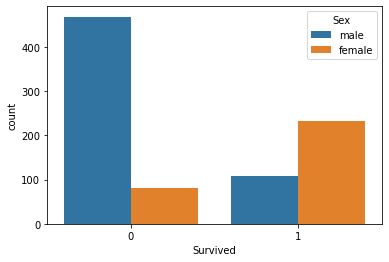

In [6]:
# how many survived in a particular class
sns.countplot(x='Survived' , hue='Sex' , data=train)

Survival rate of males is less than female - sex matters for survival

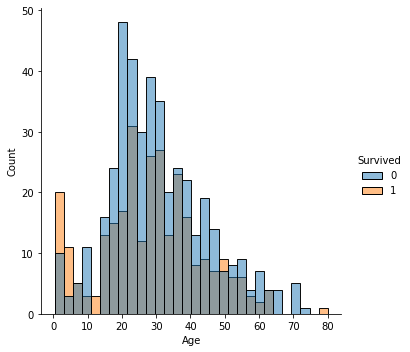

In [9]:
# use pip install sns --upgrade to use displot instead of dis't'plot (distplot)
sns.displot(data = train , x='Age' , bins=30 , kde=False  , hue='Survived')

Survival over age is normally distributed ~ kind of equal chances 

<AxesSubplot:xlabel='Survived', ylabel='count'>

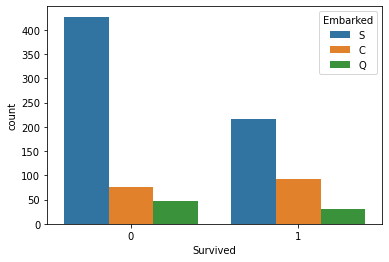

In [10]:
sns.countplot(x='Survived' , hue='Embarked' , data=train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

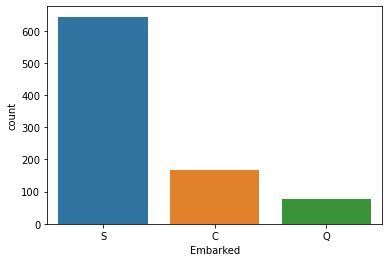

In [11]:
sns.countplot(x='Embarked',data=train)

Highest embarked from S , hence a sqew in survival and non-survival is valid

# Data Cleaning

Taking a closer look at age

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

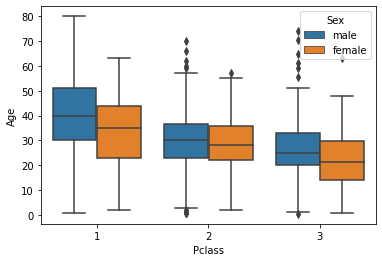

In [12]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=train)

The average age of male and female across different classes is different, using this approach we can fill in the missig data

In [13]:
grouped_age = train.groupby(['Pclass','Sex']).Age.mean()
grouped_age = grouped_age.reset_index()

# groupeed the dataframe based upon the boxplot parameters and extracted the average age from it
# reset index was for better acessing the dataframe

In [14]:
pclass = sorted(train['Pclass'].unique())
sex = sorted(train['Sex'].unique())

for pc in pclass :
    for gen in sex :
        avg_age =  grouped_age.loc[(grouped_age['Pclass']==pc) & (grouped_age['Sex']==gen) ,'Age'].values[0]
        train.loc[(train['Pclass']==pc) & (train['Sex']==gen) & (train['Age'].isnull() == True) , 'Age'] = avg_age
        
# extract the unique classes and sex labels , use them to loop over grouped data frame and fill wherever the age column
# is null based upon the class and sex parameters

<AxesSubplot:>

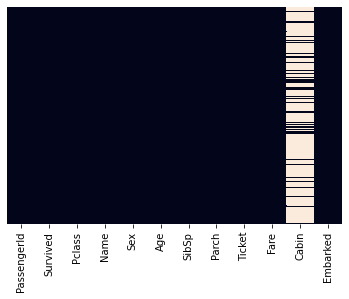

In [15]:
sns.heatmap(train.isnull(), cbar=False , yticklabels=False)

Age column is cleaned, most of the data is missing in cabin ~ dropping it , two rows from embarked can be also dropped 

In [16]:
train.drop('Cabin',inplace=True,axis=1)

In [17]:
train.dropna(inplace=True)

# convert categorical to numerical data

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
embarked_Catnum = pd.get_dummies(train['Embarked'] , drop_first=True)
sex_Catnum = pd.get_dummies(train['Sex'] , drop_first=True)
pclass_Catnum = pd.get_dummies(train['Pclass'] , drop_first=True)

In [20]:
train = pd.concat([train,sex_Catnum,embarked_Catnum,pclass_Catnum] , axis=1)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [22]:
# name and ticket can be feature engineered
train_num = train.drop(['Sex','Ticket','Embarked','Name','Pclass'] , axis=1)

In [23]:
train_num.drop('PassengerId' , axis = 1 , inplace=True)

In [24]:
train_num.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Regression

In [25]:
train_num.corr()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
Survived,1.000000,-0.072321,-0.034040,0.083151,0.255290,-0.541585,0.004536,-0.151777,0.095002,-0.320171
Age,-0.072321,1.000000,-0.250629,-0.179747,0.115477,0.118279,-0.083304,0.014445,0.024509,-0.348969
SibSp,-0.034040,-0.250629,1.000000,0.414542,0.160887,-0.116348,-0.026692,0.069438,-0.056507,0.091515
Parch,0.083151,-0.179747,0.414542,1.000000,0.217532,-0.247508,-0.081585,0.061512,-0.001278,0.014634
Fare,0.255290,0.115477,0.160887,0.217532,1.000000,-0.179958,-0.116684,-0.163758,-0.117609,-0.411932
male,-0.541585,0.118279,-0.116348,-0.247508,-0.179958,1.000000,-0.075217,0.121405,-0.066459,0.134227
Q,0.004536,-0.083304,-0.026692,-0.081585,-0.116684,-0.075217,1.000000,-0.499261,-0.127705,0.237035
S,-0.151777,0.014445,0.069438,0.061512,-0.163758,0.121405,-0.499261,1.000000,0.190824,-0.013594
2,0.095002,0.024509,-0.056507,-0.001278,-0.117609,-0.066459,-0.127705,0.190824,1.000000,-0.567432
3,-0.320171,-0.348969,0.091515,0.014634,-0.411932,0.134227,0.237035,-0.013594,-0.567432,1.000000


No. of siblings and parents children has a very low co-relation with survival , hence not accounting in the train data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x = train_num.drop(['Survived' , 'SibSp' , 'Parch','S','Q','Age'] , axis=1) # mentioned above
y = train_num['Survived']

x_train , x_test , y_train , y_test =  train_test_split(x , y , test_size= 0.3)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [30]:
predictions = lr.predict(x_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test , predictions)) # final answer , the same can be used to obtain predictions on test data

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       162
           1       0.79      0.67      0.72       105

    accuracy                           0.80       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267

